In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.optimize as fit
from scipy.optimize import curve_fit

In [33]:
df_nba = pd.read_csv('nba_2022-23_all_stats_with_salary.csv') # this is basically just for getting out the data
df_nba = df_nba[df_nba['GP'] > 20]# this is how we would filter the data, # how it would look if the games played minumum was 42
#also the indexing is wrong on the left,just look at how many rows there are

df_nba = df_nba[df_nba['MP'] > 15.0] # this is minutes playing time, has to be a float value im pretty sure

df_nba


,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,Jordan Goodwin,1280206,PG,24,WAS,62,7,17.8,2.5,...,12.9,17.3,0.9,1.3,2.2,0.097,-0.7,1.4,0.7,0.8
382,382,Sandro Mamukelashvili,1116112,C,23,SAS/MIL,43,7,15.3,2.3,...,12.1,18.2,0.4,0.5,0.9,0.063,-1.1,-1.3,-2.4,-0.1
390,390,Eugene Omoruyi,1013119,SF,25,DET/OKC,40,6,16.1,2.5,...,11.5,19.3,0.1,0.5,0.6,0.042,-3.5,-0.9,-4.4,-0.4
391,391,Kris Dunn,1000001,PG,28,UTA,22,3,25.8,5.3,...,12.8,20.2,1.3,0.6,1.9,0.162,0.7,1.7,2.4,0.6


<Axes: >

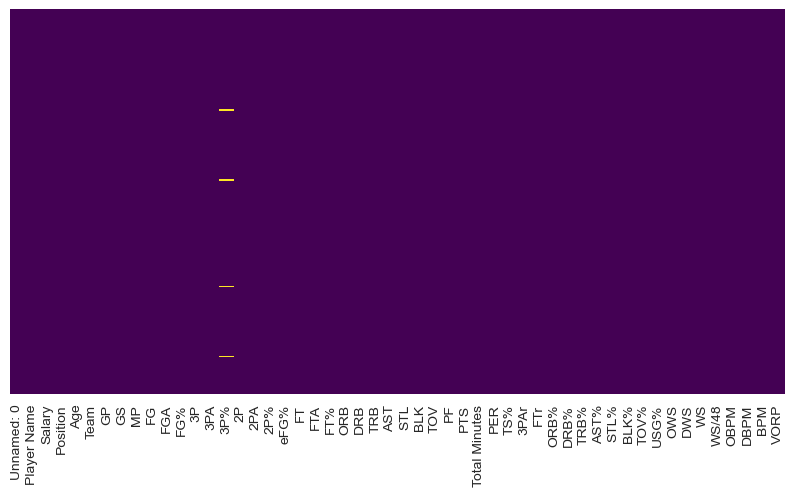

In [34]:
plt.figure(figsize=(10,5))
sb.heatmap(df_nba.isnull(),yticklabels=False,cbar=False,cmap='viridis') #3Pt% graph

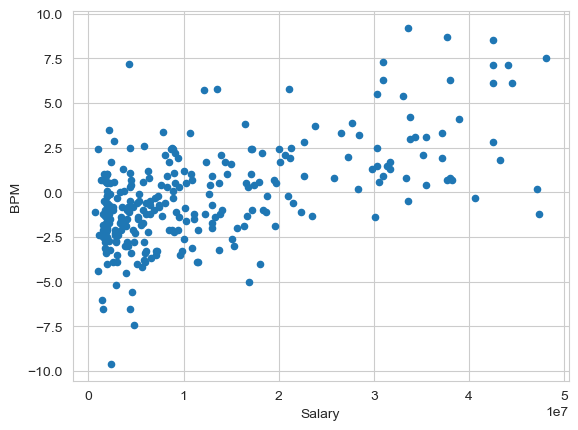

In [35]:
df_nba.plot(kind = 'scatter', x = 'Salary', y = 'BPM')
plt.show() #Basic scatter plot covering BPM's effect on Salary

In [36]:
#this is based off BPM

def f(x, m, b): # model equation, x MUST come first in the list of arguments
    return m * x + b #linear line which makes predictinps

p0 = [(34.7/48070014), -2.5] # initial guess at parameters 

parameters, covariance_matrix = fit.curve_fit(f, df_nba['Salary'], df_nba['BPM'], p0) 


In [37]:
m = parameters[0]
b = parameters[1] 
m_error = (covariance_matrix[0,0]) ** 0.5
b_error = (covariance_matrix[1,1]) ** 0.5

print('the parameters are: ',parameters)
print('m = {0:1.5f} +\- {1:1.5f}'.format(m, m_error))
print('b = {0:1.5f} +\- {1:1.5f}'.format(b, b_error))
print('final equation: y = {0:1.3f}x + {1:1.3f}'.format(m, b))

the parameters are:  [ 1.37525124e-07 -1.89580912e+00]
m = 0.00000 +\- 0.00000
b = -1.89581 +\- 0.19689
final equation: y = 0.000x + -1.896


<Axes: xlabel='Age', ylabel='count'>

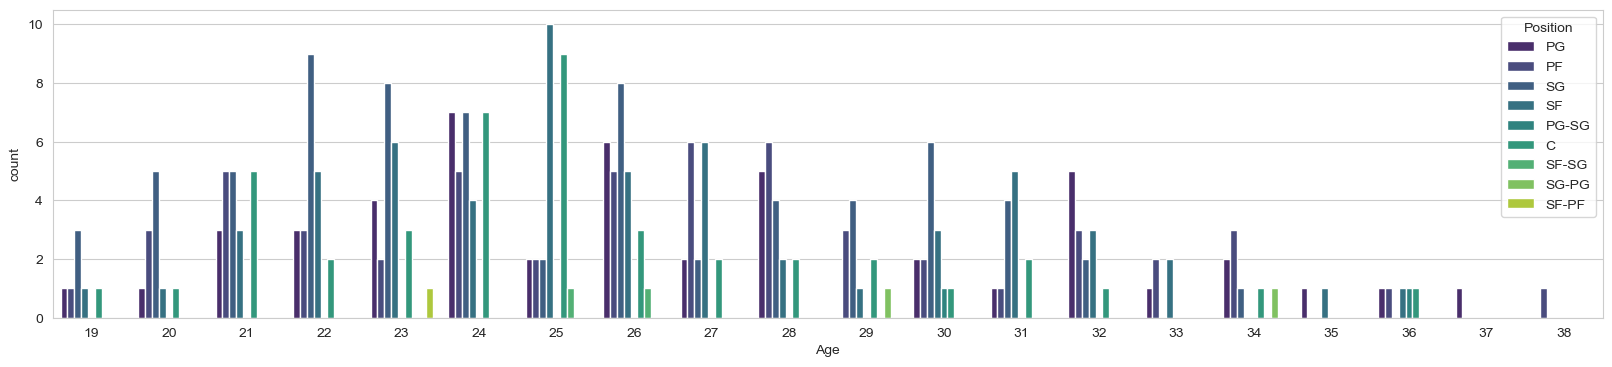

In [38]:
plt.figure(figsize=(20,4))
sb.set_style('whitegrid')
sb.countplot(x='Age',hue='Position', data=df_nba,palette='viridis')

# players count for each position based on age

<Axes: xlabel='Player Name', ylabel='Salary'>

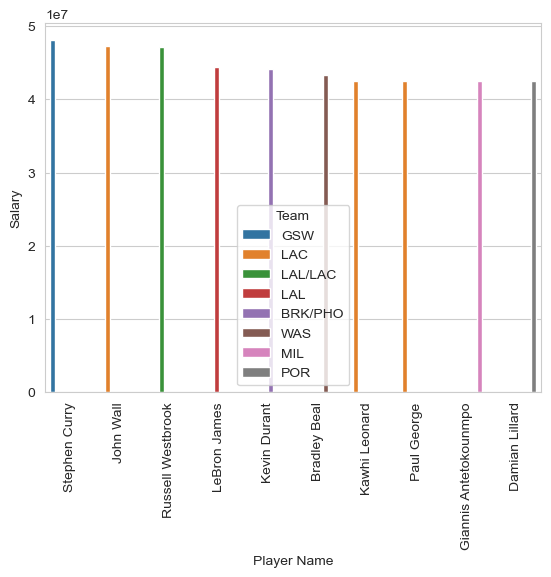

In [39]:
plt.xticks(rotation=90)
sb.barplot(df_nba.head(10),x="Player Name",y="Salary",hue="Team")#Highest salary NBA teams - player w/ highest salary

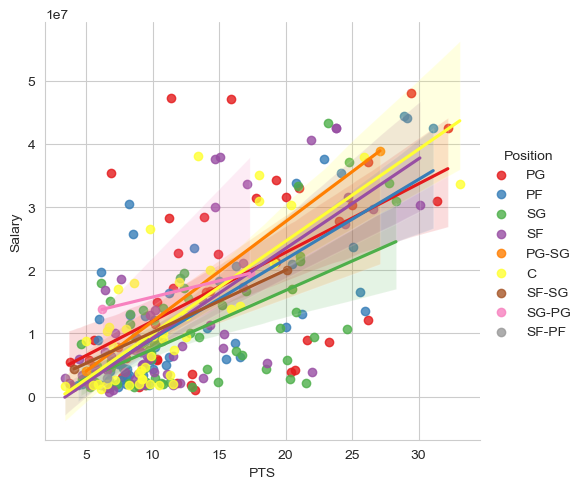

In [40]:
sb.lmplot(y='Salary',x='PTS',data=df_nba,hue='Position', palette='Set1')

# MOST IMPORTANT GRAPH

# Salary based on position, but highlights the number of points effects on the Salary of the player

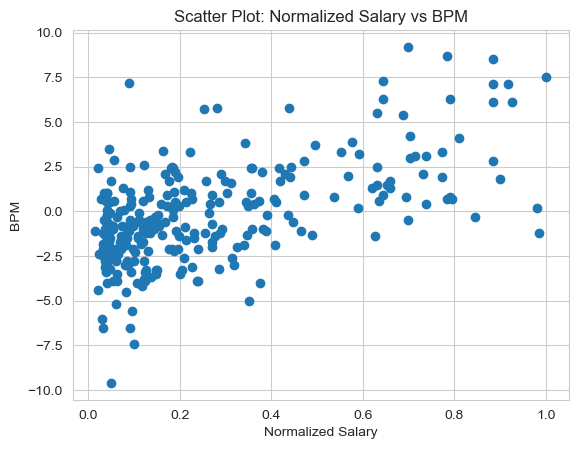


Linear Regression for BPM vs Normalized Salary:
The parameters are:  [ 6.61083484 -1.89580913]
m = 6.61083 +/- 0.55150
b = -1.89581 +/- 0.19689
Final equation: y = 6.611x + -1.896


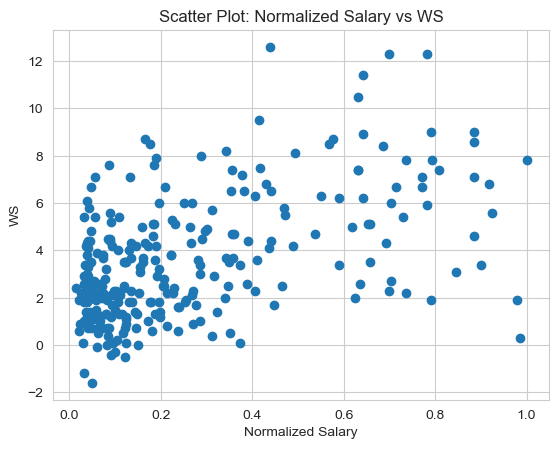


Linear Regression for WS vs Normalized Salary:
The parameters are:  [5.33416805 2.18368252]
m = 5.33417 +/- 0.53054
b = 2.18368 +/- 0.18941
Final equation: y = 5.334x + 2.184


In [43]:
# CONTAINS CODE FROM PREVIOUS CELLS, just included into functions to make the rest of the code easier


def filter_data(df_nba):
    # Filter the data based on certain criteria
    df_filtered = df_nba[(df_nba['GP'] > 20) & (df_nba['MP'] > 15.0)]
    return df_filtered

def normalize_salary(df_nba):
    # Normalize salaries for better scaling
    df_nba['NormalizedSalary'] = df_nba['Salary'] / df_nba['Salary'].max()
    return df_nba

def scatter_plot(x, y, xlabel, ylabel, title):
    # Create a scatter plot
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def linear_model_fit(x, y, x_label, y_label):
    # Fit a linear model
    def linear_function(x, m, b):
        return m * x + b

    p0 = [np.nanmean(y) / np.nanmean(x), -2.5]  # Initial guess at parameters

    parameters, covariance_matrix = curve_fit(linear_function, x, y, p0)

    m = parameters[0]
    b = parameters[1]
    m_error = np.sqrt(covariance_matrix[0, 0])
    b_error = np.sqrt(covariance_matrix[1, 1])

    print(f'\nLinear Regression for {y_label} vs {x_label}:')
    print('The parameters are: ', parameters)
    print('m = {0:1.5f} +/- {1:1.5f}'.format(m, m_error))
    print('b = {0:1.5f} +/- {1:1.5f}'.format(b, b_error))
    print('Final equation: y = {0:1.3f}x + {1:1.3f}'.format(m, b))

    return m, b

# Data preprocessing
df_nba_filtered = filter_data(df_nba)
df_nba_normalized = normalize_salary(df_nba_filtered)

# Scatter plots and linear regression for different statistics
selected_stats = ['BPM', 'WS']

for stat in selected_stats:
    # Divide salaries for better fit
    df_nba_normalized['NormalizedSalary'] = df_nba_normalized['Salary'] / df_nba_normalized['Salary'].max()

    # Scatter plot
    scatter_plot(df_nba_normalized['NormalizedSalary'], df_nba_normalized[stat],
                 xlabel='Normalized Salary', ylabel=stat, title=f'Scatter Plot: Normalized Salary vs {stat}')

    # Linear model fit
    linear_model_fit(df_nba_normalized['NormalizedSalary'], df_nba_normalized[stat],
                     x_label='Normalized Salary', y_label=stat)